# IUM 25L - Projekt
Data analysis

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from nocarz.config import RAW_DATA_DIR, PROCESSED_DATA_DIR, ID_COLUMNS, INPUT_COLUMNS, CATEGORICAL_TARGETS, NUMERICAL_TARGETS

### Users

In [2]:
users = pd.read_csv(RAW_DATA_DIR / "users.csv")
users

,id,name,surname,city,street,street_number,postal_code
0,449065179,Benedykta,Białas,Radomsko,Rybaki,250,73-281
1,29806310,Hipolit,Majewski,Nałęczów,Lubuska,432,35-782
2,176082216,Franciszka,Turowska,Mogielnica,Ajschylosa,509,91-167
3,225052416,Zbyszek,Waglewski,Konstancin-Jeziorna,Siarczanogórska,1021,68-887
4,583625490,Ola,Słowakiewicz,Łódź,Sytkowska,172,75-031
...,...,...,...,...,...,...,...
63673,22109770,Halina,Mackaewicz,Kietrz,Bobrownicka,1315,29-341
63674,400576776,Iliana,Wieczorkowska,Sulechów,Łady,1136,33-631
63675,187632320,Leokadiusz,Gogolewski,Izbica Kujawska,Rawicz-Mysłowskiego Mieczysława,112,52-273
63676,122330593,Celestyn,Glinka,Tuszyn,Młyńska Boczna,873,13-181


Basic information about the dataset

In [3]:
print(f"Number of records: {users.shape[0]}")
print(f"Number of attributes: {users.shape[1]}")
print("\nColumn information:")
users.info()

Number of records: 63678
Number of attributes: 7

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63678 entries, 0 to 63677
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             63678 non-null  int64 
 1   name           63678 non-null  object
 2   surname        63678 non-null  object
 3   city           63678 non-null  object
 4   street         63678 non-null  object
 5   street_number  63678 non-null  int64 
 6   postal_code    63678 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


Statistics for numerical columns

In [4]:
print("\nDescriptive statistics:")
users.describe().T


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
id,63678.0,1.653834e+08,1.654927e+08,5633.0,31802792.25,102999084.5,2.513039e+08,667513874.0
street_number,63678.0,6.990593e+02,4.052032e+02,1.0,346.00,699.0,1.049750e+03,1400.0


Amount and percentage of rows dropped

In [5]:
processed_users = users.dropna(subset=['id']).reset_index(drop=True)
processed_users

,id,name,surname,city,street,street_number,postal_code
0,449065179,Benedykta,Białas,Radomsko,Rybaki,250,73-281
1,29806310,Hipolit,Majewski,Nałęczów,Lubuska,432,35-782
2,176082216,Franciszka,Turowska,Mogielnica,Ajschylosa,509,91-167
3,225052416,Zbyszek,Waglewski,Konstancin-Jeziorna,Siarczanogórska,1021,68-887
4,583625490,Ola,Słowakiewicz,Łódź,Sytkowska,172,75-031
...,...,...,...,...,...,...,...
63673,22109770,Halina,Mackaewicz,Kietrz,Bobrownicka,1315,29-341
63674,400576776,Iliana,Wieczorkowska,Sulechów,Łady,1136,33-631
63675,187632320,Leokadiusz,Gogolewski,Izbica Kujawska,Rawicz-Mysłowskiego Mieczysława,112,52-273
63676,122330593,Celestyn,Glinka,Tuszyn,Młyńska Boczna,873,13-181


In [6]:
total_rows = len(users)
dropped_rows = total_rows - len(processed_users)
drop_percentage = (dropped_rows / total_rows) * 100 if total_rows > 0 else 0

print(f"Total rows in original dataset: {total_rows}")
print(f"Rows dropped due to missing 'id': {dropped_rows}")
print(f"Percentage of rows dropped: {drop_percentage:.2f}%")

Total rows in original dataset: 63678
Rows dropped due to missing 'id': 0
Percentage of rows dropped: 0.00%


Save the processed data

In [7]:
processed_users.to_csv(PROCESSED_DATA_DIR / "users.csv", index=False)

### Reviews

In [8]:
reviews = pd.read_csv(RAW_DATA_DIR / "reviews.csv")
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,42515,563807,2011-09-24,997025,Dounia,"Croix is a wonderful host, very cheerful and w..."
1,42515,1296837,2012-05-17,2348546,D Corinne,This was an ideal place to stay and Croix made...
2,42515,1358497,2012-05-27,2346980,Natalia,I went to Geneva for a one week training and s...
3,42515,2365282,2012-09-21,3503874,Ela,Spent a few days with Croix and she is an abso...
4,42515,3580013,2013-02-19,4185464,Nitin,"Noelle is a fantastic host, she made me feel a..."
...,...,...,...,...,...,...
72307,1313808360361659351,1317398851155668561,2024-12-22,593879932,Pamela Caroline,J’ai adoré mon séjour chez Isa ! Elle est une ...
72308,1313808360361659351,1318040082994961354,2024-12-23,321427694,Raphael,"Vraiment super séjour, j’ai beaucoup apprécié!..."
72309,1313808360361659351,1318848921058080173,2024-12-24,321427694,Raphael,Un grand merci pour ce séjour très agréable ! ...
72310,1313808360361659351,1319517684620627355,2024-12-25,659980121,Paulo Jorge,Isa a été magnifique comme hôte et je recomman...


Basic information about the dataset

In [9]:
print(f"Number of records: {reviews.shape[0]}")
print(f"Number of attributes: {reviews.shape[1]}")
print("\nColumn information:")
reviews.info()

Number of records: 72312
Number of attributes: 6

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     72312 non-null  int64 
 1   id             72312 non-null  int64 
 2   date           72312 non-null  object
 3   reviewer_id    72312 non-null  int64 
 4   reviewer_name  72312 non-null  object
 5   comments       72305 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.3+ MB


Statistics for numerical columns

In [10]:
print("\nDescriptive statistics:")
reviews.describe().T


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
listing_id,72312.0,2.074621e+17,3.837994e+17,42515.0,1.173646e+07,2.609328e+07,5.370116e+07,1.314417e+18
id,72312.0,5.885498e+17,5.007632e+17,563807.0,4.574197e+08,6.918819e+17,1.057096e+18,1.321742e+18
reviewer_id,72312.0,1.624679e+08,1.648932e+08,5633.0,3.036651e+07,9.950773e+07,2.468252e+08,6.675139e+08


Amount and percentage of rows dropped

In [11]:
processed_reviews = reviews.dropna(subset=['listing_id', 'id']).reset_index(drop=True)
processed_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,42515,563807,2011-09-24,997025,Dounia,"Croix is a wonderful host, very cheerful and w..."
1,42515,1296837,2012-05-17,2348546,D Corinne,This was an ideal place to stay and Croix made...
2,42515,1358497,2012-05-27,2346980,Natalia,I went to Geneva for a one week training and s...
3,42515,2365282,2012-09-21,3503874,Ela,Spent a few days with Croix and she is an abso...
4,42515,3580013,2013-02-19,4185464,Nitin,"Noelle is a fantastic host, she made me feel a..."
...,...,...,...,...,...,...
72307,1313808360361659351,1317398851155668561,2024-12-22,593879932,Pamela Caroline,J’ai adoré mon séjour chez Isa ! Elle est une ...
72308,1313808360361659351,1318040082994961354,2024-12-23,321427694,Raphael,"Vraiment super séjour, j’ai beaucoup apprécié!..."
72309,1313808360361659351,1318848921058080173,2024-12-24,321427694,Raphael,Un grand merci pour ce séjour très agréable ! ...
72310,1313808360361659351,1319517684620627355,2024-12-25,659980121,Paulo Jorge,Isa a été magnifique comme hôte et je recomman...


In [12]:
total_rows = len(reviews)
dropped_rows = total_rows - len(processed_reviews)
drop_percentage = (dropped_rows / total_rows) * 100 if total_rows > 0 else 0

print(f"Total rows in original dataset: {total_rows}")
print(f"Rows dropped due to missing 'listing_id' or 'id': {dropped_rows}")
print(f"Percentage of rows dropped: {drop_percentage:.2f}%")

Total rows in original dataset: 72312
Rows dropped due to missing 'listing_id' or 'id': 0
Percentage of rows dropped: 0.00%


### Listings

In [13]:
listings = pd.read_csv(RAW_DATA_DIR / "listings.csv")
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42515,https://www.nocarz.pl/rooms/42515,20241229042300,2024-12-29,city scrape,Geneva center - Hosting females,NaN,NaN,https://a0.muscache.com/pictures/10640277/ff1d...,185647,...,4.84,4.85,4.55,NaN,f,1,0,1,0,0.49
1,203997,https://www.nocarz.pl/rooms/203997,20241229042300,2024-12-29,city scrape,Top location studio 1 block from lake!,"Spacious studio with washer/dryer, Wi-fi, supe...",This is the most sought after area in Geneva: ...,https://a0.muscache.com/pictures/14163740/9392...,1001280,...,4.99,4.96,4.81,NaN,t,2,2,0,0,0.60
2,276025,https://www.nocarz.pl/rooms/276025,20241229042300,2024-12-29,city scrape,Lovely flat by Geneva lake,This cozy flat is located in a very pleasant v...,"Versoix is a pretty fishing village, on the ed...",https://a0.muscache.com/pictures/4156456/d3aed...,1442438,...,4.89,4.77,4.68,NaN,f,1,1,0,0,0.78
3,338682,https://www.nocarz.pl/rooms/338682,20241229042300,2024-12-29,city scrape,Top location 1 block from the lake!,One bedroom apartment located in a pedestrian ...,This is the favourite area for expats in Genev...,https://a0.muscache.com/pictures/14164129/db92...,1001280,...,4.89,4.87,4.70,NaN,t,2,2,0,0,0.77
4,399388,https://www.nocarz.pl/rooms/399388,20241229042300,2024-12-29,city scrape,Nice modern bedroom with balcony,Nice modern bedroom with confortable king size...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1994454,...,4.89,4.70,4.70,NaN,f,2,0,2,0,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,1318859808229991842,https://www.nocarz.pl/rooms/1318859808229991842,20241229042300,2024-12-29,city scrape,Apparemment semi-meublés,This two bedroom apartment stands out for its ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,668547423,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2753,1319353272672215826,https://www.nocarz.pl/rooms/1319353272672215826,20241229042300,2024-12-29,city scrape,Appart situé à la gare,2 rooms Cornavin station <br />Fully furnished...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,269431889,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2754,1319753554977771528,https://www.nocarz.pl/rooms/1319753554977771528,20241229042300,2024-12-29,city scrape,Apparemment douillet,"Make life easier at this peaceful, centrally l...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,650441160,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
2755,1319753624300180036,https://www.nocarz.pl/rooms/1319753624300180036,20241229042300,2024-12-29,city scrape,appartement douillet,"Make life easier at this peaceful, centrally l...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,650441160,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN


Basic information about the dataset

In [14]:
print(f"Number of records: {listings.shape[0]}")
print(f"Number of attributes: {listings.shape[1]}")
print("\nColumn information:")
listings.info()

Number of records: 2757
Number of attributes: 75

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2757 non-null   int64  
 1   listing_url                                   2757 non-null   object 
 2   scrape_id                                     2757 non-null   int64  
 3   last_scraped                                  2757 non-null   object 
 4   source                                        2757 non-null   object 
 5   name                                          2757 non-null   object 
 6   description                                   2659 non-null   object 
 7   neighborhood_overview                         1052 non-null   object 
 8   picture_url                                   2757 non-null   object

Statistics for numerical columns

In [15]:
print("\nDescriptive statistics:")
listings.describe().T


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
id,2757.0,5.713685e+17,5.283351e+17,4.251500e+04,3.443725e+07,6.926612e+17,1.075261e+18,1.320188e+18
scrape_id,2757.0,2.024123e+13,0.000000e+00,2.024123e+13,2.024123e+13,2.024123e+13,2.024123e+13,2.024123e+13
host_id,2757.0,1.794862e+08,1.919876e+08,6.783700e+04,1.776888e+07,9.446290e+07,2.737343e+08,6.685474e+08
host_listings_count,2757.0,3.521545e+01,9.560836e+01,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,3.940000e+02
host_total_listings_count,2757.0,4.677983e+01,1.207214e+02,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,4.470000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,2757.0,4.620714e+01,1.972549e-02,4.614243e+01,4.619667e+01,4.620567e+01,4.621263e+01,4.635168e+01
longitude,2757.0,6.144963e+00,2.480122e-02,5.973910e+00,6.133790e+00,6.145190e+00,6.155490e+00,6.273080e+00
accommodates,2757.0,2.642728e+00,1.503393e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.500000e+01
bathrooms,2067.0,1.179245e+00,4.908848e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.500000e+00


Amount and percentage of rows dropped

In [16]:
processed_listings = listings.dropna(subset=ID_COLUMNS + INPUT_COLUMNS + NUMERICAL_TARGETS + CATEGORICAL_TARGETS).reset_index(drop=True)
processed_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,203997,https://www.nocarz.pl/rooms/203997,20241229042300,2024-12-29,city scrape,Top location studio 1 block from lake!,"Spacious studio with washer/dryer, Wi-fi, supe...",This is the most sought after area in Geneva: ...,https://a0.muscache.com/pictures/14163740/9392...,1001280,...,4.99,4.96,4.81,NaN,t,2,2,0,0,0.60
1,276025,https://www.nocarz.pl/rooms/276025,20241229042300,2024-12-29,city scrape,Lovely flat by Geneva lake,This cozy flat is located in a very pleasant v...,"Versoix is a pretty fishing village, on the ed...",https://a0.muscache.com/pictures/4156456/d3aed...,1442438,...,4.89,4.77,4.68,NaN,f,1,1,0,0,0.78
2,338682,https://www.nocarz.pl/rooms/338682,20241229042300,2024-12-29,city scrape,Top location 1 block from the lake!,One bedroom apartment located in a pedestrian ...,This is the favourite area for expats in Genev...,https://a0.muscache.com/pictures/14164129/db92...,1001280,...,4.89,4.87,4.70,NaN,t,2,2,0,0,0.77
3,411058,https://www.nocarz.pl/rooms/411058,20241229042300,2024-12-29,city scrape,5th Sky (Downtown Geneva),"Unique & quiet attic loft located in Pâquis, t...",The Pâquis quarter is one of Geneva's most col...,https://a0.muscache.com/pictures/airflow/Hosti...,1706035,...,4.96,4.89,4.64,NaN,f,1,0,1,0,0.43
4,419631,https://www.nocarz.pl/rooms/419631,20241229042300,2024-12-29,city scrape,Beautiful Apm't in central Geneva (NB Guest Room),Fabulous apartment with design interior in cha...,Quiet yet very central<br /><br />N.B. If you ...,https://a0.muscache.com/pictures/e591abb4-fc83...,2086993,...,4.99,4.86,4.91,NaN,t,2,1,1,0,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1293405202953996124,https://www.nocarz.pl/rooms/1293405202953996124,20241229042300,2024-12-29,city scrape,Charmant appartement central,Located in the heart of Geneva's central Plain...,Located between the banking district and the U...,https://a0.muscache.com/pictures/miso/Hosting-...,662958583,...,5.00,5.00,5.00,NaN,f,1,1,0,0,6.86
757,1294840081798451394,https://www.nocarz.pl/rooms/1294840081798451394,20241229042300,2024-12-29,city scrape,Unique & Tasteful Apartment,This beautifully designed 1-bedroom apartment ...,"Located in the heart of Geneva, this apartment...",https://a0.muscache.com/pictures/miso/Hosting-...,3528377,...,NaN,NaN,NaN,NaN,f,101,92,7,0,NaN
758,1306371056773680806,https://www.nocarz.pl/rooms/1306371056773680806,20241229042300,2024-12-29,city scrape,Appartement cosy à deux pas du lac,Enjoy a stylish and central home.,"In this neighborhood popular with tourists, re...",https://a0.muscache.com/pictures/hosting/Hosti...,46140427,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
759,1306557735982208252,https://www.nocarz.pl/rooms/1306557735982208252,20241229042300,2024-12-29,city scrape,Charming Vintage Apartment,Charming vintage apartment in the famous Paqui...,You can find fantastic restaurants in the neig...,https://a0.muscache.com/pictures/miso/Hosting-...,1667362,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [17]:
total_rows = len(listings)
dropped_rows = total_rows - len(processed_listings)
drop_percentage = (dropped_rows / total_rows) * 100 if total_rows > 0 else 0

print(f"Total rows in original dataset: {total_rows}")
print(f"Rows dropped due to missing values: {dropped_rows}")
print(f"Percentage of rows dropped: {drop_percentage:.2f}%")

Total rows in original dataset: 2757
Rows dropped due to missing values: 1996
Percentage of rows dropped: 72.40%


### Property types

In [18]:
processed_listings['property_type'].describe()

count                    761
unique                    27
top       Entire rental unit
freq                     397
Name: property_type, dtype: object

In [19]:
property_type_counts = processed_listings['property_type'].value_counts()

print("Most common property types:")
print(property_type_counts.head(10))

Most common property types:
property_type
Entire rental unit                   397
Private room in rental unit          151
Entire condo                          54
Entire home                           23
Private room in bed and breakfast     20
Private room in home                  18
Entire serviced apartment             13
Private room in condo                 12
Room in hotel                         10
Private room in townhouse              9
Name: count, dtype: int64


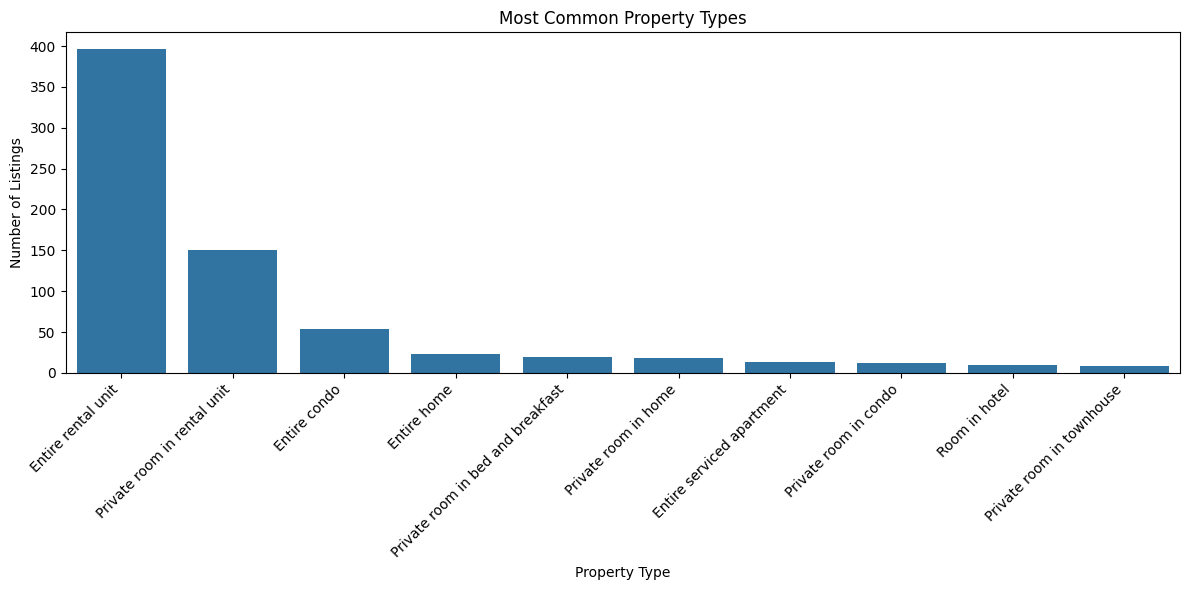

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=property_type_counts.head(10).index, y=property_type_counts.head(10).values)
plt.title("Most Common Property Types")
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Prediction columns

In [21]:
processed_listings['price'] = processed_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print("Numerical Columns Statistics")
numerical_stats = processed_listings[NUMERICAL_TARGETS].describe().T
numerical_stats['missing'] = processed_listings[NUMERICAL_TARGETS].isna().sum()
numerical_stats['missing_percent'] = (processed_listings[NUMERICAL_TARGETS].isna().sum() / len(processed_listings) * 100).round(2)
display(numerical_stats)

print("\nCategorical Columns")
categorical_stats = []

for col in CATEGORICAL_TARGETS:
    unique_count = processed_listings[col].nunique()
    missing_count = processed_listings[col].isna().sum()
    missing_percent = (missing_count / len(processed_listings) * 100).round(2)

    value_counts = processed_listings[col].value_counts().head(5)
    top_values = ", ".join([f"{val} ({count})" for val, count in value_counts.items()])
    if len(top_values) > 100:
        top_values = top_values[:100] + "..."

    categorical_stats.append({
        'Column': col,
        'Unique Values': unique_count,
        'Missing Values': f"{missing_count} ({missing_percent}%)",
        'Top 5 Values (count)': top_values
    })

display(pd.DataFrame(categorical_stats))

Numerical Columns Statistics


,count,mean,std,min,25%,50%,75%,max,missing,missing_percent
accommodates,761.0,2.725361,1.632564,1.0,2.0,2.0,4.0,15.0,0,0.0
bathrooms,761.0,1.253614,0.516889,0.0,1.0,1.0,1.5,6.0,0,0.0
bedrooms,761.0,1.302234,0.861827,0.0,1.0,1.0,1.0,6.0,0,0.0
beds,761.0,1.725361,1.203941,0.0,1.0,1.0,2.0,12.0,0,0.0
price,761.0,164.938239,398.398709,18.0,82.0,115.0,170.0,9726.0,0,0.0



Categorical Columns


,Column,Unique Values,Missing Values,Top 5 Values (count)
0,property_type,27,0 (0.0%),"Entire rental unit (397), Private room in rent..."
1,room_type,4,0 (0.0%),"Entire home/apt (521), Private room (235), Sha..."
2,bathrooms_text,17,0 (0.0%),"1 bath (390), 1 shared bath (103), 1.5 baths (..."
3,neighbourhood,67,0 (0.0%),"Genève, Switzerland (464), Geneva, Switzerland..."
4,name,757,0 (0.0%),"Old Town - Central Geneva (2), Cosy studio (2)..."
5,description,716,0 (0.0%),"In the heart of the City of Geneva, Hotel Les ..."


Save the processed data

In [22]:
processed_listings = processed_listings[ID_COLUMNS + CATEGORICAL_TARGETS + NUMERICAL_TARGETS]
processed_listings.to_csv(PROCESSED_DATA_DIR / "listings.csv", index=False)

Split the dataset into train and test sets

In [23]:
train_data, test_data = train_test_split(processed_listings, test_size=0.2, random_state=42)
train_data.to_csv(PROCESSED_DATA_DIR / "train.csv", index=False)
test_data.to_csv(PROCESSED_DATA_DIR / "test.csv", index=False)